![Logo](../../assets/logo.png)

Made by **Domonkos Nagy**

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/Fortuz/rl_education/blob/main/3.%20Dynamic%20Programming/Gambler's%20Problem/gamblers_problem_solution.ipynb)

# Gambler's Problem (solution)

A gambler has the opportunity to make bets on
the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many
dollars as he has staked on that flip; if it is tails, he loses his stake.

<img src="assets/coinflip.jpg" width="500"/>

The game ends
when the gambler wins by reaching his goal of \\$100, or loses by running out of money.
On each flip, the gambler must decide what portion of his capital to stake, in integer
numbers of dollars. This problem can be formulated as an undiscounted, episodic, finite
MDP. The state is the gambler’s capital, $ s \in {1, 2, . . . , 99} $ and the actions
are stakes, $ a \in {0, 1, . . . , min(s, 100 - s)} $. The reward is zero on all transitions
except those on which the gambler reaches his goal, when it is +1.

Our goal is to find the optimal policy for this problem. We will implement a simple
algorithm that uses *value iteration* to solve the Bellman equation for the state-value
function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PROB_HEADS = 0.4  # Probability that a coin comes up heads
THETA = 1e-12  # Error treshold for the value iteration
GAMMA = 1 # Discount factor

In [3]:
v_estimations = np.zeros(101)  # Value function
policy = np.zeros(101, dtype=int)  # Policy

## Value Iteration

In *value iteration*, we start with an arbitrary initial value function and then iteratively improve it until it converges to the optimal value function. At each iteration, we update the value of each state based on the Bellman optimality equation, which states that the value of a state is equal to the immediate reward plus the discounted value of the successor states, weighted by the probability of transitioning to those states under the optimal policy.
The algorithm uses the following update rule:

$$ v_{k+1}(s) = \max_a \sum_{s', r}p(s', r | s, a) [r + \gamma v_k(s')] $$

By repeatedly applying the Bellman optimality equation, the value function converges to the optimal value function in the limit. In practice, we stop when the magnitude of the greatest update, $\delta$ falls below a sufficiently low treshold, $\theta$.
The code below implements value iteration for this problem, and plots out the value function after each iteration.

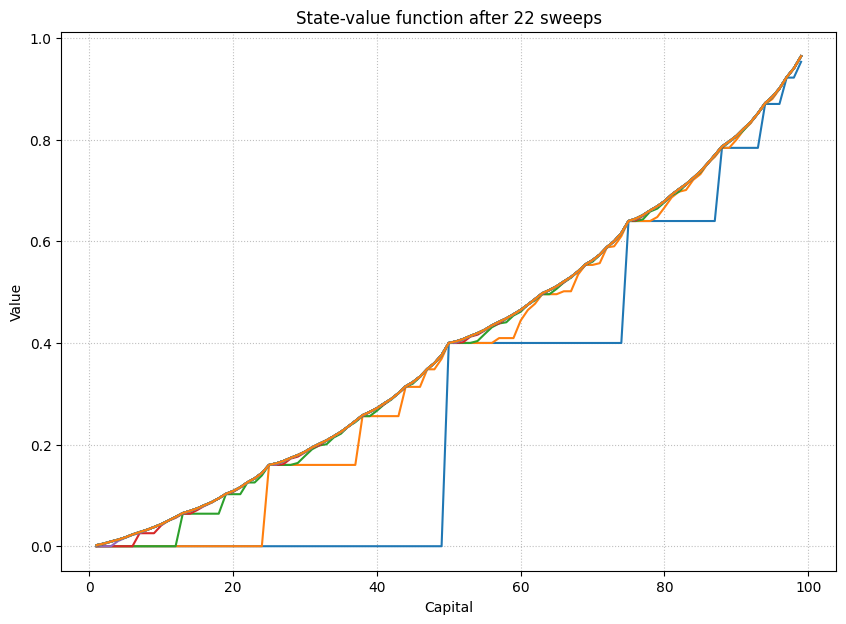

In [4]:
delta = THETA
i = 0
plt.figure(figsize=(10,7))

while delta >= THETA:
    delta = 0

    # Terminal states (0 and 100) are excluded from the loop
    for state in range(1, 100):
        v_old = v_estimations[state]

        best_action_value = 0
        best_action = 0

        for action in range(1, min(state, 100 - state) + 1):

            # State after winning/losing
            state_win = state + action
            state_lose = max(0, state - action)

            # Set reward if winning reaches the goal
            reward_win = 1 if state_win == 100 else 0

            # Calculate action value
            action_value = 0
            action_value += PROB_HEADS * (reward_win + GAMMA * v_estimations[state_win])
            action_value += (1 - PROB_HEADS) * GAMMA * v_estimations[state_lose]

            # If the difference is less than the error margin, we don't
            # update the best action
            if action_value - THETA > best_action_value:
                best_action_value = action_value
                best_action = action

        # Update the value function and the policy
        v_estimations[state] = best_action_value
        policy[state] = best_action

        # Update delta
        delta = max(delta, abs(v_old - best_action_value))

    # Add the resulting value funtion to the plot
    plt.plot(np.arange(1, 100), v_estimations[1:100])
    i += 1

# Plot state-value functions
plt.xlabel('Capital')
plt.ylabel('Value')
plt.grid(alpha=0.8, linestyle=':', zorder=0)
plt.title(f'State-value function after {i} sweeps')
plt.show()

## Optimal policy
The resulting policy can be seen below. The x axis corresponds to the state (the current capital), and the y axis shows the optimal amount of money to bet in a given state. As you can see, the graph has a peculiar, self-similar shape. Can you explain why? Think about how you would approach this problem, and keep the value of `PROB_HEADS` in mind!

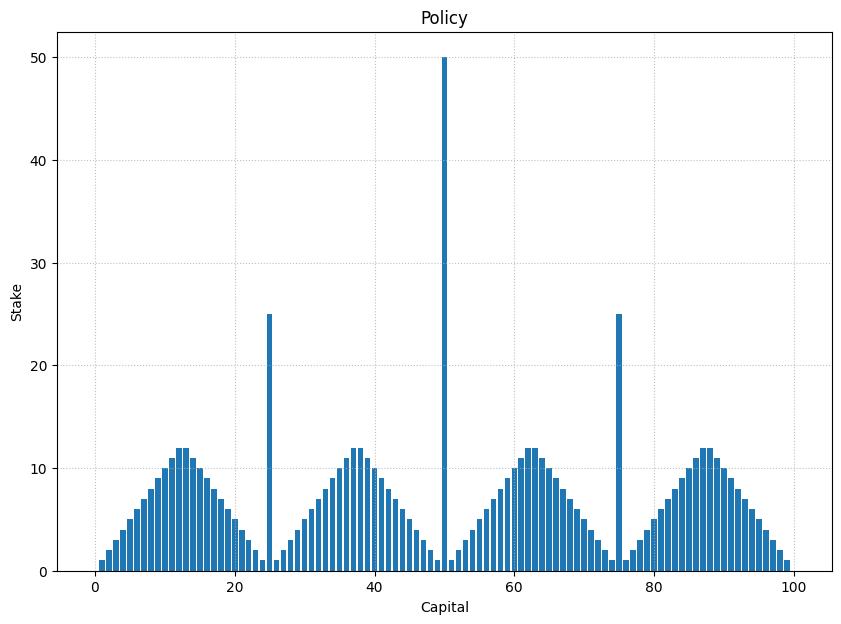

In [5]:
# Plot policy
plt.figure(figsize=(10,7))
plt.bar(np.arange(101), policy)
plt.xlabel('Capital')
plt.ylabel('Stake')
plt.title('Policy')
plt.grid(alpha=0.8, linestyle=':', zorder=0)
plt.show()